In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 음성 인식(Speech Recognition)

- 유튭 : 이수안 컴퓨터 연구소 
- https://youtu.be/WZt2_-S261g

## Speech To Text(STT)

* STT는 음성을 입력받아 그에 해당하는 구문(문자열)을 얻는 기술
* 딥러닝을 이용한 STT 모델에는 WaveNet 등이 존재
* SpeechRecognition을 이용하면 모델을 학습시키지 않고도 간편하게 구현 가능



### 라이브러리 소개 및 설치



*   음성 인식 기술은 음성 데이터가 대부분 크고, 관련 기술 코드도 상당히 길어 구현이 힘듬
*   SpeechRecognition을 사용하면 이러한 과정 없이 음성 인식 기술을 이용할 수 있음



In [ ]:
# 라이브러리 설치
# 할때마다 실행해야하네 
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.2 MB/s 


In [ ]:
!python --version

Python 3.7.14


In [ ]:
# pip list

### Recognizer



*   SpeechRecognition 라이브러리의 기능을 이용하기 위해선 Recognizer 객체를 생성



In [ ]:
# Recognizer 객체
import speech_recognition as sr

r = sr.Recognizer()

* 여러 기업에서 제공하는 음성 인식 기술 사용 가능
  + `recognize_google()` - Google Web Speech API
  + `recognize_google_cloud()` - Google Cloud Speech
  + `recognize_bing()` - Microsoft Bing Speech
  + `recognize_houndify()` - SoundHound Houndify
  + `recognize_ibm()` - IBM Speech to Text
  + `recognize_wit()` - Wit.ai
  + `recognize_sphinx()` - CMU Sphinx (Sphinx는 오프라인으로 동작하며, 나머지 모든 함수는 인터넷 연결이 되어야만 사용 가능)



## 음성 데이터

* SpeechRecognition 지원 파일 형식
  * WAV
  * AIFF
  * AIFF-C
  * FLAC

* OpenSpeechRepository에서 제공하는 Harvard Sentence 데이터 사용
  + http://www.voiptroubleshooter.com/open_speech/
* SpeechRecognition을 사용하기 위해 데이터를 AudioFile 객체로 변환



In [ ]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

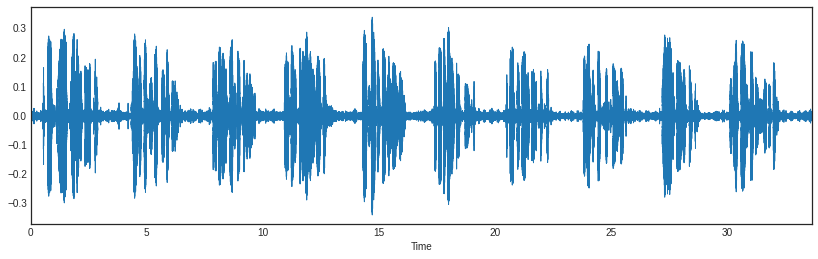

In [ ]:
plt.style.use('seaborn-white')

pig = plt.figure(figsize=(14,4))

# 파일 다운받아서 추가함.
american_wav, rate=librosa.core.load('구글경로/american.wav')
librosa.display.waveplot(american_wav, sr=rate)

ipd.Audio(american_wav, rate=rate)

## 음성 인식

### 영어(English)




* SpeechRecognition이 기본으로 지원하는 언어
* STT를 구현하기 위해선 먼저 recognizer의 record 함수를 이용해 데이터를 입력
* recognize를 이용해 각 기업에서 제공하는 api를 통해 음성에 해당하는 구문을 얻을 수 있음



In [ ]:
# 오디오파일 불러오기
american_audio = sr.AudioFile('구글경로/american.wav')
with american_audio as source :
  audio=r.record(source)

r.recognize_google(audio_data = audio, language='en-US')

"Birch canoe slid on the smooth plank glue the sea to a dark blue background it is easy to tell the depth of the well these days a chicken leg of a variegated price is often served in Randall's the juice of lemons makes find the boxes on the side the pump truck the ha grimstead top corn and garbage for hours of City Works in a large size and stockings and hard to sell"

In [ ]:
# 100% 아닌거 같음

* record 함수를 사용할 때 duration을 지정하면 시작 지점에서 원하는 초만큼의 데이터만 입력 가능
* 지정된 음성에 대한 문자열만 얻는 것을 볼 수 있음





In [ ]:
# 일부 구간만 가능

# duration=4 : 4초만큼
with american_audio as source :
  audio=r.record(source, duration=4)

r.recognize_google(audio_data = audio, language='en-US')

'Birch canoe slid on the smooth planks'

* offset을 지정하면 offset에 해당하는 초부터 데이터를 입력
* duration과 offset을 이용해 원하는 지점, 범위만큼 데이터 입력 가능
*   단, 앞뒤 데이터를 고려하는 특성 상 데이터를 일부만 입력하면 상대적으로 성능이 떨어질 수 있음
*   결과를 보면 같은 지점인데도 아까와는 다른 결과가 나오는 것을 볼 수 있음


In [ ]:
with american_audio as source :
  # offset=2 : 2초부터 시작
  audio=r.record(source, offset=2)

r.recognize_google(audio_data = audio, language='en-US')

"turn on the smooth plank glue the seat to a dark blue background it is easy to tell the depth of the well these days is a very good price is often served in Randall's the juice of lemons makes find the boxes down beside the pump truck the Hogs are fed top corn and garbage for hours of City Works in a large size and stockings and hard to sell"



---



### 한국어(Korean)

* https://www.dropbox.com/s/fp8p8dspu74eq7x/korean.wav

In [ ]:
# 한국어 wav 파일 다운받기
!wget https://www.dropbox.com/s/fp8p8dspu74eq7x/korean.wav

--2022-09-30 11:45:12--  https://www.dropbox.com/s/fp8p8dspu74eq7x/korean.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fp8p8dspu74eq7x/korean.wav [following]
--2022-09-30 11:45:13--  https://www.dropbox.com/s/raw/fp8p8dspu74eq7x/korean.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc784b18a1b84fd01f91f3326c3e.dl.dropboxusercontent.com/cd/0/inline/Bt4Qg1D9ktr-L_tirf4rNhCD1kQBcYRQ_sufV9o3m9jphYGF2eadHk88DUcK2P8kH6zHzJMTtIevKH7FSWMByNVDD_umoCguAjysm6Rr-hlQgiVf_nvpZrRlIROw7RyydhxBbociZpWelB69ydD9gvHTL76Tl37BJlW082gRxg3ipQ/file# [following]
--2022-09-30 11:45:13--  https://uc784b18a1b84fd01f91f3326c3e.dl.dropboxusercontent.com/cd/0/inline/Bt4Qg1D9ktr-L_tirf4rNhCD1kQBcYRQ_sufV9o3m9jphYGF2eadHk88DUcK2P8kH6zHzJMTtIevKH7FSWMB

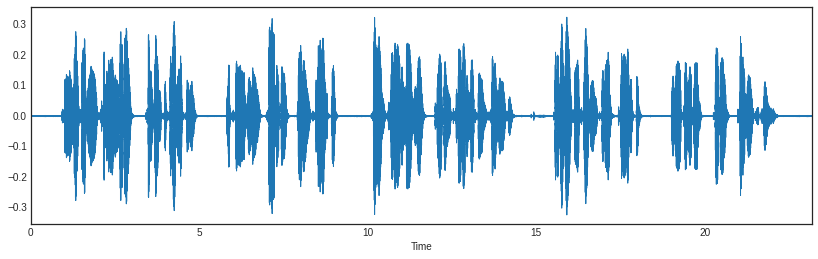

In [ ]:
fig = plt.figure(figsize=(14,4))
korean_wav, rate = librosa.core.load('korean.wav')
librosa.display.waveplot(korean_wav, sr=rate)
ipd.Audio(korean_wav, rate=rate)

In [ ]:
korean_audio = sr.AudioFile('korean.wav')
with korean_audio as source:
  audio = r.record(source)

r.recognize_google(audio_data=audio, language='ko-KR')

'죽는 날까지 하늘을 우러러 한점 부끄럼이 없기를 잎새에이는 바람에도 나는 괴로워했다 별을 노래하는 마음으로 모든 죽어가는 것을 사랑해야지 그리고 나한테 주어진 길을 걸어야겠다 오늘 밤에도 별이 바람에 스치운다'

In [ ]:
# 띄어쓰기 빼고는 나쁘지않음.



---



In [ ]:
fig = plt.figure(figsize=(14,4))
korean_wav, rate = librosa.core.load('구글경로/AHAAA21000349.wav')
librosa.display.waveplot(korean_wav, sr=rate)
ipd.Audio(korean_wav, rate=rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
korean_audio = sr.AudioFile('구글경로/AHAAA21000349.wav')
with korean_audio as source:
  audio = r.record(source)

r.recognize_google(audio_data=audio, language='ko-KR')

'여러분 안녕하십니까 6월 20일 수요일 EBS 정오뉴스입니다 강원도교육청이 정부의 입시 규정을 위반한 했다는 의혹이 제기된 강원외국어고등학교에 대한 감사의 착수했습니다 강원도교육청은 2011학년도 신입생 선발과정에서 중학교 3학년 영어성적과 면접만으로 선발하는 료칸 정부 입시 규정을 어기고 국어와 수학을 내신성적 가지 반영했던 의혹이 제기돼 감사의 착수했다고 하였습니다 이에 대해 국어와 수학을 성적은 참고만 했을뿐 입시에는 반영하지 않았다고 주장한 것으로 알려졌습니다 강원외고는 지방자치단체가 설립한 최초의 공립형 사립학교로 지난 2010년 3월 개그 했습니다 영유아의인지 정서적 발달 수준에 판단할 수 있는 영유아발달검사 개발됩니다 보건복지부는 최근 보육과 치매 관련 서비스가 빠르게 성장함에 따라 영유아발달검사 와 치매환자 인지재활프로그램 개발을 2012년도 신규 사회서비스 연구개발과제를 선정에 집중육성 하기로 했다고 밝혔습니다 특히 영유아 발달 검사는 한국 영유아에게 적합한인지 정서 신체적 발달수준을 판단할 수 있는 도구로 개발될 예정입니다 택시업계가 생존권보장을 촉구하며 오늘 하루 총파업에 돌입했습니다 전국 택시 타는 이번 파업에 전국 250여개 택시회사 소속 법인택시 개인택시 16만 5천 원에 등 택시 25만대 대부분이 동참했다며 택시산업 대중교통과 와 LPG 가격 인하 등 구제책 마련을 촉구했다 운행하고 배차 횟수도 크게 늘렸습니다 2012여수세계박람회 입장권 가격이 오는 28일부터 대폭 할인됩니다 여수엑스포 조직위는 오늘 엑스포 관람객 지원 확대방안에 발표하고 성인 기준 20만 원 인정기간 권을 28일부터 50% 할인된 10만 원에 판매 한다고 하셨습니다 또 청소년과 어린이 경로 전기 강권도 각각 7만 5천 원 5만 원 등 절반가격으로 인하됩니다 야간 거는 성인 기준 6,000원 인하했고 학생과 장애인 경로 야간 거니 신설돼 5,000원에 판매를 예정입니다 조절기는 박람회 교육적 목적과 살리기 위해 학생단체 건 가격도 획기적으로 이날 방침입니다 정부가

In [ ]:
# 오류가 조금 있음 
# 료칸이란 단어를 사용 안했는데 텍스트로 인식됨.



---



In [ ]:
# 응사 사투리 얼마나 잘 먹히는지
fig = plt.figure(figsize=(14,4))
korean_wav, rate = librosa.core.load('구글경로/1994.wav')
librosa.display.waveplot(korean_wav, sr=rate)
ipd.Audio(korean_wav, rate=rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
korean_audio = sr.AudioFile('구글경로/1994.wav')
with korean_audio as source:
  audio = r.record(source)

r.recognize_google(audio_data=audio, language='ko-KR')

RequestError: ignored

In [ ]:
# 구글은 긴 문장은 오류가 난다고 하는데 위에 6분짜리는 성공했는데 왜 이건 안되지?